# Project C：交通流量预测- JetRail高铁的乘客数量预测


In [1]:
#数据加载
import pandas as pd
df=pd.read_csv('train.csv')
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [2]:
# 转化时间格式
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [3]:
# 去掉多余列
df.index=df.Datetime
df.drop(['ID','Datetime'],axis=1,inplace=True)
df

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [4]:
# 按天统计数据
df_daily=df.resample('D').sum()
df_daily
df_daily['ds']=df_daily.index
df_daily['y']=df_daily.Count
df_daily.drop(['Count'],axis=1,inplace=True)

In [5]:
from fbprophet import Prophet
# prophet模型
m= Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
m.fit(df_daily)
# 预测未来7个月
future=m.make_future_dataframe(periods=213)
forecast= m.predict(future)
forecast

INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\tmb1\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-09,-735.473331,-3157.654831,2341.777655,-735.473331,-735.473331,308.614849,308.614849,308.614849,119.868042,119.868042,119.868042,188.746806,188.746806,188.746806,0.0,0.0,0.0,-426.858482
1,2012-01-10,-731.253282,-2978.776824,2649.123592,-731.253282,-731.253282,545.042597,545.042597,545.042597,322.220510,322.220510,322.220510,222.822088,222.822088,222.822088,0.0,0.0,0.0,-186.210685
2,2012-01-11,-727.033234,-3091.277393,2444.823401,-727.033234,-727.033234,451.943232,451.943232,451.943232,193.590255,193.590255,193.590255,258.352977,258.352977,258.352977,0.0,0.0,0.0,-275.090002
3,2012-01-12,-722.813186,-2848.507370,2588.892165,-722.813186,-722.813186,543.147164,543.147164,543.147164,248.842266,248.842266,248.842266,294.304897,294.304897,294.304897,0.0,0.0,0.0,-179.666022
4,2012-01-13,-718.593138,-3090.290339,2259.511841,-718.593138,-718.593138,289.375575,289.375575,289.375575,-40.257263,-40.257263,-40.257263,329.632837,329.632837,329.632837,0.0,0.0,0.0,-429.217563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,2015-07-06,6796.445992,4798.613147,10005.063637,6551.485533,7051.787249,469.044163,469.044163,469.044163,119.868042,119.868042,119.868042,349.176120,349.176120,349.176120,0.0,0.0,0.0,7265.490155
1275,2015-07-07,6800.308900,4473.054962,10315.740561,6554.109434,7057.747618,698.310198,698.310198,698.310198,322.220510,322.220510,322.220510,376.089689,376.089689,376.089689,0.0,0.0,0.0,7498.619098
1276,2015-07-08,6804.171808,4832.648281,10176.498868,6556.557135,7063.707988,594.416938,594.416938,594.416938,193.590255,193.590255,193.590255,400.826682,400.826682,400.826682,0.0,0.0,0.0,7398.588745
1277,2015-07-09,6808.034716,4715.749571,10301.971852,6558.496267,7069.668357,671.517594,671.517594,671.517594,248.842266,248.842266,248.842266,422.675328,422.675328,422.675328,0.0,0.0,0.0,7479.552310


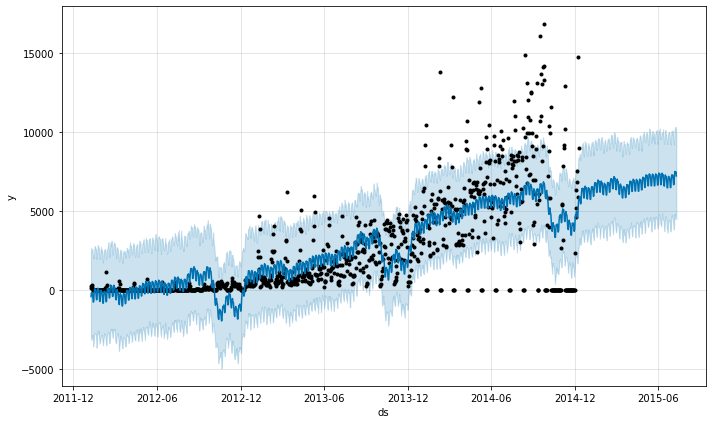

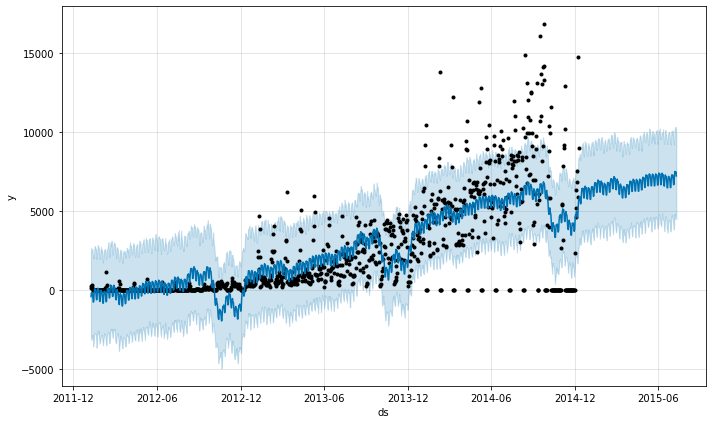

In [6]:
m.plot(forecast)